# Bibliotecas

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

# Leitura

In [377]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"
df = pd.read_html(url)[0] 
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.dtypes

Country                             object
Continent                           object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                      int64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under_five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                          object
HIV/AIDS                           float64
GDP                                float64
Population                          object
thinness 1-19 years                float64
thinness 5-9 years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: obje

# Quest1

## Análise

In [378]:
df1 = df
df1.sort_values(by='Year', ascending=False, inplace=True)
df1 = df1.groupby('Country').first().reset_index()
df1

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Albania,Europe,2015,Developing,77.8,74,0,4.60,364.975229,99.0,...,99.0,6.00,99,0.1,3954.227830,28873,1.2,1.3,0.762,14.2
2,Algeria,Africa,2015,Developing,75.6,19,21,0.00,0.000000,95.0,...,95.0,7.21,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4
3,Angola,Africa,2015,Developing,52.4,335,66,0.00,0.000000,64.0,...,7.0,3.31,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,North America,2015,Developing,76.4,13,0,0.00,0.000000,99.0,...,86.0,5.54,99,0.2,13566.954100,Unknown,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Uruguay,South America,2015,Developing,77.0,116,0,0.00,0.000000,95.0,...,95.0,8.58,95,0.1,15524.842470,3431552,1.5,1.4,0.794,15.5
152,Uzbekistan,Asia,2015,Developing,69.4,184,15,0.00,0.000000,99.0,...,99.0,5.84,99,0.1,2137.576852,312989,3.0,3.1,0.697,12.1
153,Vanuatu,Oceania,2015,Developing,72.0,13,0,0.00,0.000000,64.0,...,65.0,5.20,64,0.1,285.834140,26463,1.5,1.4,0.598,10.8
154,Zambia,Africa,2015,Developing,61.8,33,27,0.00,0.000000,9.0,...,9.0,4.99,9,4.1,1313.889646,161587,6.3,6.1,0.576,12.5


In [379]:
df_unic = df['Status'].unique()
df_unic

array(['Developing', 'Developed'], dtype=object)

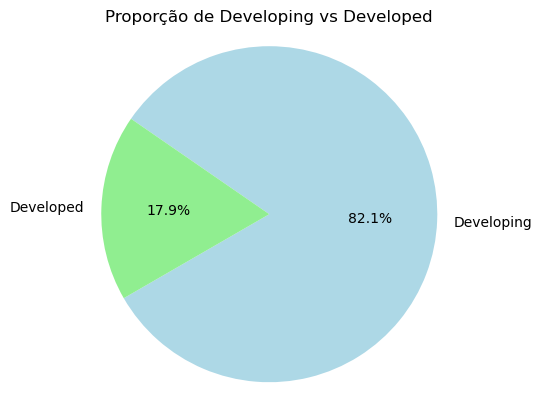

In [380]:
status_counts = df1['Status'].value_counts()

plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=210)
plt.axis('equal')
plt.title("Proporção de Developing vs Developed")
plt.show()

## Porcentagens:
--------------------
Developed = 17.9%
-------------------
Developing = 82.1%
-------------------

# Questão 2

## Análise

In [381]:
df2 = df

In [382]:
df2_media = df2['Life_expectancy'].mean()
df2_var = df2['Life_expectancy'].var()
print(f'A média é: {df2_media:.2f}\nA variância é: {df2_var:.2f}')

A média é: 69.46
A variância é: 92.92


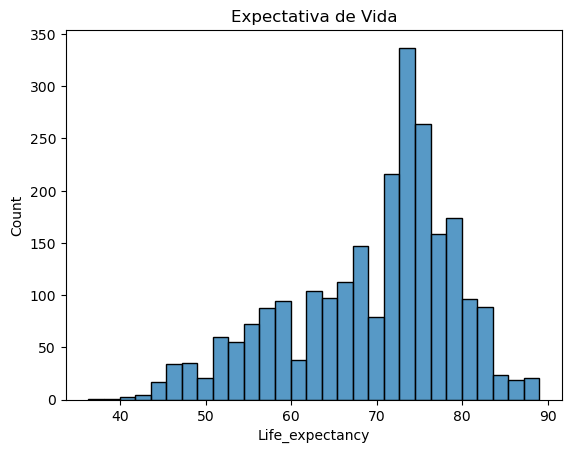

In [383]:
sns.histplot(data=df['Life_expectancy'], edgecolor='black')
plt.title('Expectativa de Vida')
plt.show()

### A média é: 69.46
-------------------
### A variância é: 92.92
--------------------

# Questão 3

In [384]:
paises = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']

In [385]:
df3 = df[df['Country'].isin(paises)].reset_index(drop=True)
df3


,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Angola,Africa,2015,Developing,52.4,335,66,0.00,0.000000,64.0,...,7.0,NaN,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
1,Netherlands,Europe,2015,Developed,81.9,57,1,0.00,0.000000,94.0,...,95.0,NaN,95,0.1,44292.884730,16939923,1.0,0.9,0.923,18.1
2,Ireland,Europe,2015,Developed,81.4,64,0,0.00,0.000000,95.0,...,95.0,NaN,95,0.1,6664.144000,4676835,0.3,0.2,0.920,18.6
3,Finland,Europe,2015,Developing,81.1,76,0,0.00,0.000000,NaN,...,97.0,NaN,97,0.1,4245.397440,5479531,0.9,0.8,0.893,17.0
4,Zambia,Africa,2015,Developing,61.8,33,27,0.00,0.000000,9.0,...,9.0,NaN,9,4.1,1313.889646,161587,6.3,6.1,0.576,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Ireland,Europe,2000,Developed,76.4,94,0,14.07,3794.581463,NaN,...,86.0,6.30,86,0.1,26241.918830,385174,0.3,0.3,0.848,16.2
76,Netherlands,Europe,2000,Developed,78.1,84,1,10.06,2944.640134,NaN,...,97.0,7.42,97,0.1,25921.127940,15925513,1.1,1.1,0.873,16.5
77,Zambia,Africa,2000,Developing,43.8,614,44,2.62,45.616880,NaN,...,85.0,7.16,85,18.7,341.955625,1531221,7.5,7.5,0.418,9.6
78,Finland,Europe,2000,Developing,77.5,15,0,8.59,397.753369,NaN,...,96.0,7.22,99,0.1,24253.254200,517629,0.9,0.9,0.847,17.3


## Item 1

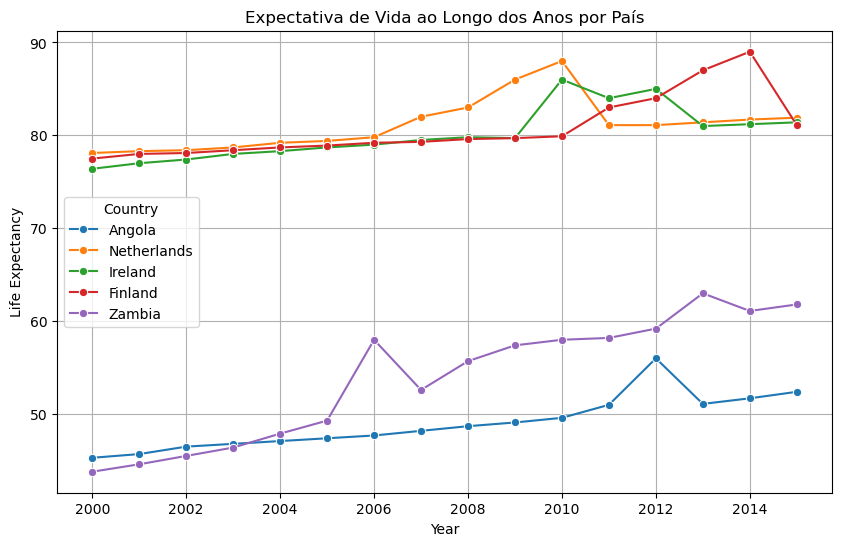

In [386]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df3, x='Year', y='Life_expectancy', hue='Country', marker='o')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Expectativa de Vida ao Longo dos Anos por País')
plt.legend(title='Country')
plt.grid(True)



## Item 2

In [387]:
df4 = df[df['Year']== 2014].reset_index(drop=True)
df4.sort_values('Life_expectancy', ascending=False,inplace=True)
df4.reset_index(drop=True, inplace=True)
pais_maior = df4.loc[df4['Life_expectancy'].idxmax(), 'Country']
pais_menor = df4.loc[df4['Life_expectancy'].idxmin(), 'Country']
print(f'País com a maior expectativa de vida é: {pais_maior}\nO com a menor é: {pais_menor}')

País com a maior expectativa de vida é: Portugal
O com a menor é: Sierra Leone


# Questão 4

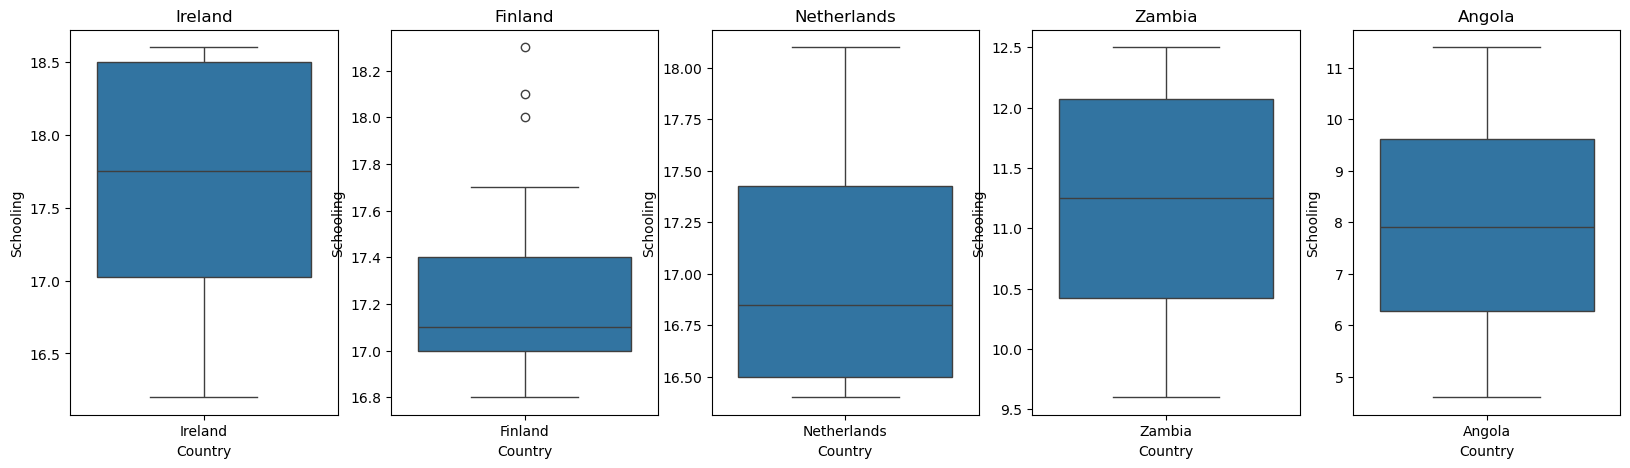

In [388]:
fig, axes = plt.subplots(1, 5, figsize=(20,5))
for ax, country in zip(axes, paises):
    sns.boxplot(x='Country', y='Schooling', data=df3[df3['Country'] == country], ax=ax)
    ax.set_title(country)
plt.show()

In [389]:
median_schooling = df3.groupby('Country')['Schooling'].median()
median_schooling

Country
Angola          7.90
Finland        17.10
Ireland        17.75
Netherlands    16.85
Zambia         11.25
Name: Schooling, dtype: float64

### O país que apresneta uma quantidade de "mais tempo estudado" com relação a mediana é a Irelanda

# Questão 5

In [390]:
url = "https://www.worldometers.info/world-population/population-by-country/"
# Send a GET request to the URL
response = requests.get(url)
# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
# Find the table containing the population data
table = soup.find('table', {'id': 'example2'})
# Convert the table to a Pandas DataFrame
df = pd.read_html(str(table))[0]
# Print the DataFrame
df.head()

/tmp/ipykernel_3215/1390704985.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1450935791,0.89 %,12866195,488,2973190,-630830,2.0,28,37 %,17.78 %
1,2,China,1419321278,-0.23 %,-3263655,151,9388211,-318992,1.0,40,66 %,17.39 %
2,3,United States,345426571,0.57 %,1949236,38,9147420,1286132,1.6,38,82 %,4.23 %
3,4,Indonesia,283487931,0.82 %,2297864,156,1811570,-38469,2.1,30,59 %,3.47 %
4,5,Pakistan,251269164,1.52 %,3764669,326,770880,-1401173,3.5,20,34 %,3.08 %


In [391]:
df.drop('Country (or dependency)', axis=1,inplace=True)
df

,#,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,1450935791,0.89 %,12866195,488,2973190,-630830,2.0,28,37 %,17.78 %
1,2,1419321278,-0.23 %,-3263655,151,9388211,-318992,1.0,40,66 %,17.39 %
2,3,345426571,0.57 %,1949236,38,9147420,1286132,1.6,38,82 %,4.23 %
3,4,283487931,0.82 %,2297864,156,1811570,-38469,2.1,30,59 %,3.47 %
4,5,251269164,1.52 %,3764669,326,770880,-1401173,3.5,20,34 %,3.08 %
...,...,...,...,...,...,...,...,...,...,...,...
229,230,4389,-0.70 %,-31,44,100,-7,1.4,42,11 %,0.00 %
230,231,3470,-0.20 %,-7,0,12170,-13,1.7,42,68 %,0.00 %
231,232,2506,4.55 %,109,251,10,72,2.6,27,0 %,0.00 %
232,233,1819,0.11 %,2,7,260,10,2.5,36,44 %,0.00 %


In [392]:
df.dtypes

#                       int64
Population  (2024)      int64
Yearly  Change         object
Net  Change             int64
Density  (P/Km²)        int64
Land Area  (Km²)        int64
Migrants  (net)         int64
Fert.  Rate           float64
Med.  Age               int64
Urban  Pop %           object
World  Share           object
dtype: object

In [393]:
df['Yearly  Change'].unique()

array(['0.89 %', '-0.23 %', '0.57 %', '0.82 %', '1.52 %', '2.10 %',
       '0.41 %', '1.22 %', '-0.43 %', '2.62 %', '0.86 %', '-0.50 %',
       '1.75 %', '0.83 %', '3.30 %', '0.63 %', '1.06 %', '0.23 %',
       '0.00 %', '-0.05 %', '0.66 %', '2.92 %', '0.17 %', '1.26 %',
       '-0.26 %', '1.98 %', '0.68 %', '1.08 %', '-0.06 %', '0.81 %',
       '2.79 %', '1.41 %', '2.15 %', '0.35 %', '2.88 %', '3.03 %',
       '1.13 %', '-0.58 %', '0.98 %', '3.09 %', '0.34 %', '1.99 %',
       '1.23 %', '2.96 %', '1.89 %', '1.10 %', '2.47 %', '-0.15 %',
       '2.65 %', '0.37 %', '3.34 %', '0.99 %', '0.31 %', '4.57 %',
       '2.98 %', '2.27 %', '-0.44 %', '2.61 %', '2.85 %', '1.29 %',
       '5.07 %', '0.54 %', '-0.54 %', '3.54 %', '2.35 %', '1.55 %',
       '0.75 %', '1.80 %', '2.42 %', '2.49 %', '2.16 %', '1.38 %',
       '4.01 %', '1.16 %', '0.22 %', '0.85 %', '3.62 %', '-0.36 %',
       '1.70 %', '-0.68 %', '0.53 %', '1.94 %', '0.18 %', '-1.90 %',
       '-0.11 %', '-0.65 %', '0.58 %', '1.37 %', 

In [394]:
df['Urban  Pop %'].unique()

array(['37 %', '66 %', '82 %', '59 %', '34 %', '54 %', '91 %', '42 %',
       '75 %', '22 %', '87 %', '93 %', '41 %', '49 %', '44 %', '73 %',
       '76 %', '53 %', '84 %', '39 %', '72 %', '31 %', '81 %', '35 %',
       '29 %', '79 %', '74 %', '95 %', '27 %', '33 %', '80 %', '67 %',
       '68 %', '48 %', '77 %', '58 %', '92 %', '40 %', '24 %', 'N.A.',
       '18 %', '86 %', '63 %', '83 %', '19 %', '46 %', '55 %', '85 %',
       '52 %', '56 %', '89 %', '65 %', '26 %', '38 %', '47 %', '14 %',
       '70 %', '71 %', '61 %', '99 %', '12 %', '88 %', '45 %', '69 %',
       '62 %', '60 %', '97 %', '57 %', '32 %', '23 %', '96 %', '78 %',
       '25 %', '94 %', '16 %', '20 %', '28 %', '90 %', '100 %', '15 %',
       '43 %', '0 %', '98 %', '11 %'], dtype=object)

In [395]:
df['World  Share'].unique()

array(['17.78 %', '17.39 %', '4.23 %', '3.47 %', '3.08 %', '2.85 %',
       '2.60 %', '2.13 %', '1.77 %', '1.62 %', '1.60 %', '1.52 %',
       '1.43 %', '1.42 %', '1.34 %', '1.24 %', '1.12 %', '1.07 %',
       '1.04 %', '0.88 %', '0.85 %', '0.84 %', '0.82 %', '0.78 %',
       '0.73 %', '0.69 %', '0.67 %', '0.65 %', '0.63 %', '0.62 %',
       '0.61 %', '0.59 %', '0.57 %', '0.56 %', '0.52 %', '0.50 %',
       '0.49 %', '0.47 %', '0.46 %', '0.45 %', '0.44 %', '0.42 %',
       '0.39 %', '0.36 %', '0.35 %', '0.33 %', '0.32 %', '0.30 %',
       '0.29 %', '0.28 %', '0.27 %', '0.26 %', '0.25 %', '0.24 %',
       '0.23 %', '0.22 %', '0.20 %', '0.18 %', '0.17 %', '0.15 %',
       '0.14 %', '0.13 %', '0.12 %', '0.11 %', '0.10 %', '0.09 %',
       '0.08 %', '0.07 %', '0.06 %', '0.05 %', '0.04 %', '0.03 %',
       '0.02 %', '0.01 %', '0.00 %'], dtype=object)

In [396]:
df['Yearly  Change'] = df['Yearly  Change'].str.replace('%','').astype(float)/100
df.replace('N.A.', np.nan,inplace=True)
df['Urban  Pop %'] = df['Urban  Pop %'].str.replace('%', '').astype(float)/100
df['World  Share'] = df['World  Share'].str.replace('%', '').astype(float)/100
df

,#,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,1450935791,0.0089,12866195,488,2973190,-630830,2.0,28,0.37,0.1778
1,2,1419321278,-0.0023,-3263655,151,9388211,-318992,1.0,40,0.66,0.1739
2,3,345426571,0.0057,1949236,38,9147420,1286132,1.6,38,0.82,0.0423
3,4,283487931,0.0082,2297864,156,1811570,-38469,2.1,30,0.59,0.0347
4,5,251269164,0.0152,3764669,326,770880,-1401173,3.5,20,0.34,0.0308
...,...,...,...,...,...,...,...,...,...,...,...
229,230,4389,-0.0070,-31,44,100,-7,1.4,42,0.11,0.0000
230,231,3470,-0.0020,-7,0,12170,-13,1.7,42,0.68,0.0000
231,232,2506,0.0455,109,251,10,72,2.6,27,0.00,0.0000
232,233,1819,0.0011,2,7,260,10,2.5,36,0.44,0.0000


In [397]:
df.dtypes

#                       int64
Population  (2024)      int64
Yearly  Change        float64
Net  Change             int64
Density  (P/Km²)        int64
Land Area  (Km²)        int64
Migrants  (net)         int64
Fert.  Rate           float64
Med.  Age               int64
Urban  Pop %          float64
World  Share          float64
dtype: object

In [398]:
df.corr()

,#,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
#,1.000000,-0.362005,-0.287952,-0.368506,0.124527,-0.392084,0.029181,-0.226990,0.279522,-0.016559,-0.362099
Population (2024),-0.362005,1.000000,-0.011954,0.523137,-0.025541,0.449786,-0.237466,-0.034340,-0.015963,-0.028942,0.999999
Yearly Change,-0.287952,-0.011954,1.000000,0.231786,-0.076171,0.010268,0.063031,0.628564,-0.665817,-0.219276,-0.011866
Net Change,-0.368506,0.523137,0.231786,1.000000,-0.029962,0.097684,-0.224971,0.259889,-0.273917,-0.173140,0.523207
Density (P/Km²),0.124527,-0.025541,-0.076171,-0.029962,1.000000,-0.058298,-0.011282,-0.123338,0.184173,0.115870,-0.025518
Land Area (Km²),-0.392084,0.449786,0.010268,0.097684,-0.058298,1.000000,0.081904,-0.021409,0.014046,0.123839,0.449721
Migrants (net),0.029181,-0.237466,0.063031,-0.224971,-0.011282,0.081904,1.000000,-0.121995,0.152957,0.193661,-0.237517
Fert. Rate,-0.226990,-0.034340,0.628564,0.259889,-0.123338,-0.021409,-0.121995,1.000000,-0.849637,-0.417065,-0.034362
Med. Age,0.279522,-0.015963,-0.665817,-0.273917,0.184173,0.014046,0.152957,-0.849637,1.000000,0.403356,-0.016002
Urban Pop %,-0.016559,-0.028942,-0.219276,-0.173140,0.115870,0.123839,0.193661,-0.417065,0.403356,1.000000,-0.029050


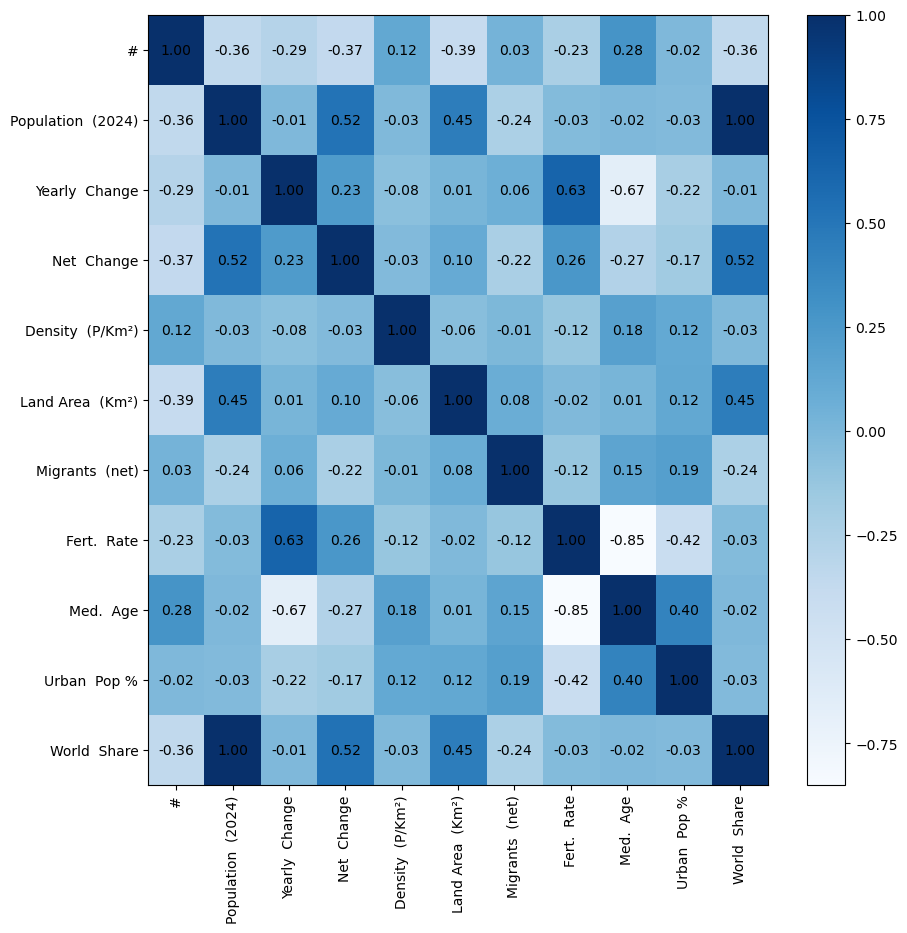

In [401]:
df_corr = df.corr()
plt.figure(figsize=(10,10))
plt.imshow(df_corr, cmap='Blues', interpolation= 'none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns, rotation=90)
plt.yticks(range(len(df_corr)), df_corr.columns)
for i in range(len(df_corr)):
    for j in range(len(df_corr)):
        text = plt.text(j, i, f'{df_corr.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.grid(False)
plt.show()

## Os dados mais bem correlacionados são:
### World share e a população 
### Fert Rate e Med Age
### Yealy Change e Med. Age.